In [1]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess data
data = pd.read_csv("NFLX_DATA2023.csv")
data = data[['Open', 'High', 'Low', 'Volume', 'Adj Close']]

In [3]:
# Min-max normalization using MinMaxScaler
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [4]:
X = normalized_df.drop('Adj Close', axis=1).values
y = normalized_df['Adj Close'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
Y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [6]:
# Model definition
class LinearRegression(nn.Module):
    def __init__(self, input_features):
        super(LinearRegression, self).__init__()
        self.layer = nn.Linear(input_features, 1)

    def forward(self, X):
        return self.layer(X)

input_features = X_train.shape[1]
model = LinearRegression(input_features)

In [7]:
# Loss function and optimizer
loss_func = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr=0.01)

In [8]:
# Training loop
epochs = 800
train_losses = []

for epoch in range(epochs):
    model.train()
    pred = model(X_train_tensor)
    loss = loss_func(pred, Y_train_tensor)

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

    train_losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [100/800], Loss: 0.0366
Epoch [200/800], Loss: 0.0163
Epoch [300/800], Loss: 0.0085
Epoch [400/800], Loss: 0.0045
Epoch [500/800], Loss: 0.0025
Epoch [600/800], Loss: 0.0014
Epoch [700/800], Loss: 0.0009
Epoch [800/800], Loss: 0.0006


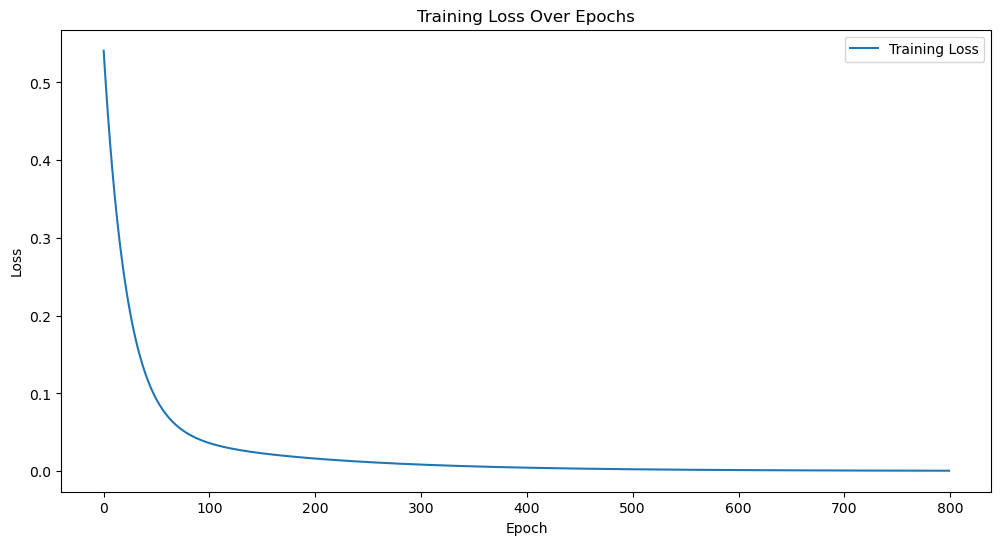

In [9]:
# Plot training loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

In [10]:
# Evaluation
model.eval()
with torch.no_grad():  # Use torch.no_grad() for evaluation
    test_predictions = model(X_test_tensor).squeeze()
    test_loss = loss_func(test_predictions, Y_test_tensor.squeeze())

    # Convert tensors to NumPy arrays for test metrics
    test_predictions_np = test_predictions.numpy()
    Y_test_np = Y_test_tensor.squeeze().numpy()

    # Calculate MAE and R-squared
    test_mae = mean_absolute_error(Y_test_np, test_predictions_np)
    test_r2 = r2_score(Y_test_np, test_predictions_np)

    print(f'Test Loss (MSE): {test_loss.item():.4f}')
    print(f'Test MAE: {test_mae:.4f}')
    print(f'Test R-squared: {test_r2:.4f}')

   


Test Loss (MSE): 0.0006
Test MAE: 0.0170
Test R-squared: 0.9896


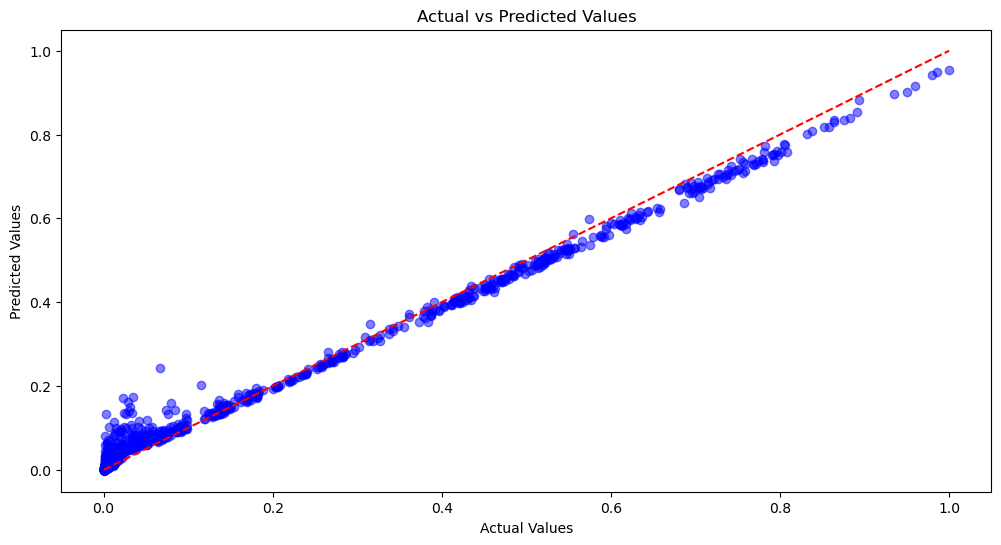

In [12]:
 # Plot Actual vs Predicted Values
plt.figure(figsize=(12, 6))
plt.scatter(Y_test_np, test_predictions_np, alpha=0.5, color='blue')
plt.plot([min(Y_test_np), max(Y_test_np)], [min(Y_test_np), max(Y_test_np)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()